In [4]:
import pandas as pd
from pyspark.sql import SparkSession
import pyspark.sql.functions as F
import seaborn as sns
import os

In [5]:
def groupby_nan_percent(df,key_column,value_column):
    return (df.groupby(key_column,dropna=False)[value_column].apply(lambda x: x.isnull().sum())/df.fillna(0).groupby(key_column,dropna=False)[value_column].count()).round(4)*100

def satelites_join_medidas(df_dict):
    joined_df = None
    for df in df_dict.values():
        if joined_df is None:
            joined_df = df
        else:
            joined_df = joined_df.join(df,['data','lat','lon'],'outer')
    return joined_df

def statistical_description(df):
    vl_columns = [c for c in df.columns if c.startswith('vl')]
    print("Descrição estatística das colunas")
    len_df = df.count()
    print(f"Número de linhas: {len_df}")
    print(f"Datas: De {df.select(F.min('data')).collect()[0][0]} até {df.select(F.max('data')).collect()[0][0]}")
    df.describe().select(['summary']+[F.round(F.col(c),2).alias(c) for c in vl_columns]).filter(F.col('summary')!='count').show()
    print("Quantidade de valores nulos por coluna:")
    for c in vl_columns:
        print(f'Coluna {c}: {df.filter(F.col(c).isNull()).count()}')


In [6]:
spark = SparkSession.builder.appName("Mateus") \
    .config("spark.sql.shuffle.partitions", "100") \
    .config("spark.sql.files.maxPartitionBytes", "128MB") \
    .config("spark.sql.files.openCostInBytes", "4MB")  \
    .config("spark.driver.maxResultSize", "4g") \
    .config("spark.driver.memory", "16g")  \
    .config("spark.executor.cores", "4") \
    .config("spark.executor.memory", "8g") \
    .config("spark.sql.execution.arrow.enabled", "true") \
    .config("spark.sql.execution.arrow.pyspark.enabled", "true") \
    .config("spark.dynamicAllocation.enabled", "true") \
    .config("spark.dynamicAllocation.minExecutors", "1") \
    .config("spark.dynamicAllocation.maxExecutors", "4")  \
    .getOrCreate()

KeyboardInterrupt: 

In [ ]:
initial_path = 'C:/Users/Mateus Santos Rochas/Desktop/Estudos/07. Doutorado - Matemática aplicada/Pesquisa/Dados R2'
bronze_path = os.path.join(initial_path,'1. bronze')

# 2. Estações

## 2.1. ANA

In [ ]:
ana = pd.read_csv(os.path.join(bronze_path,'ana.csv'))
ana.head()

,id_estacao,lat,lon,data,tmin,tmed,tmax,prec,urmin,urmed,urmax
0,574937,-22.5283,-43.2029,2021-11-19,NaN,NaN,NaN,32.0,NaN,NaN,NaN
1,574937,-22.5283,-43.2029,2021-11-20,NaN,NaN,NaN,64.2,NaN,NaN,NaN
2,574937,-22.5283,-43.2029,2021-11-21,NaN,NaN,NaN,5.4,NaN,NaN,NaN
3,574937,-22.5283,-43.2029,2021-11-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,574937,-22.5283,-43.2029,2021-11-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print("Estações ANA possuem apenas dados de precipitação")
print()
print("~~~~~~~~ PRECIPITAÇÃO ~~~~~~~~")

print(f"Porcentagem de registros nulos geral: {round(len(ana.loc[ana['prec'].isna()])*100/len(ana),2)}%")
print()
print(f"Porcentagem de registros nulos por estação:")
print(groupby_nan_percent(ana,'id_estacao','prec'))
print()
print("Descrição dos dados da coluna de precipitação registrados:")
ana['prec'].dropna().describe()


Estações ANA possuem apenas dados de precipitação

~~~~~~~~ PRECIPITAÇÃO ~~~~~~~~
Porcentagem de registros nulos geral: 54.74%

Porcentagem de registros nulos por estação:
id_estacao
574937    89.62
575953    27.76
577468    91.89
Name: prec, dtype: float64

Descrição dos dados da coluna de precipitação registrados:


count    2704.000000
mean       54.661056
std       276.374147
min         0.000000
25%         0.000000
50%         0.000000
75%         1.600000
max      1819.600000
Name: prec, dtype: float64

## 2.2. CEMADEN

In [ ]:
cemaden = pd.read_csv(os.path.join(bronze_path,'cemaden.csv'))
cemaden.head()

,id_estacao,lat,lon,data,tmin,tmed,tmax,prec,urmin,urmed,urmax
0,574937,-22.5283,-43.2029,2021-11-19,NaN,NaN,NaN,32.0,NaN,NaN,NaN
1,574937,-22.5283,-43.2029,2021-11-20,NaN,NaN,NaN,64.2,NaN,NaN,NaN
2,574937,-22.5283,-43.2029,2021-11-21,NaN,NaN,NaN,5.4,NaN,NaN,NaN
3,574937,-22.5283,-43.2029,2021-11-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,574937,-22.5283,-43.2029,2021-11-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print("Os dados de CEMADEN estão idênticos ao Ana!")
# print()
# print("~~~~~~~~ PRECIPITAÇÃO ~~~~~~~~")

# print(f"Porcentagem de registros nulos geral: {round(len(cemaden.loc[cemaden['prec'].isna()])*100/len(cemaden),2)}%")
# print()
# print(f"Porcentagem de registros nulos por estação:")
# print(groupby_nan_percent(cemaden,'id_estacao','prec'))
# print()
# print("Data minima por estação:")
# print(ana.groupby('id_estacao')['data'].min())
# print()
# print("Descrição dos dados da coluna de precipitação registrados:")
# cemaden['prec'].dropna().describe()

Os dados de CEMADEN estão idênticos ao Ana!


## 2.3. CEMIG

In [ ]:
cemig = pd.read_csv(os.path.join(bronze_path,'cemig.csv'))
cemig.head()

,id_estacao,lat,lon,data,tmin,tmed,tmax,prec,urmin,urmed,urmax
0,1173,-20.7102,-46.6413,1992-08-24,12.0,15.0,18.0,NaN,NaN,NaN,NaN
1,1173,-20.7102,-46.6413,1992-08-25,8.0,15.5,23.0,NaN,NaN,NaN,NaN
2,1173,-20.7102,-46.6413,1992-08-26,8.0,17.0,26.0,NaN,NaN,NaN,NaN
3,1173,-20.7102,-46.6413,1992-08-27,11.0,20.5,30.0,NaN,NaN,NaN,NaN
4,1173,-20.7102,-46.6413,1992-08-28,15.0,22.5,30.0,NaN,NaN,NaN,NaN


In [ ]:
print("Os dados do CEMIG só não possuem a coluna urmed (Umidade Relativa Média)")
print()
print("~~~~~~~~ DATAS MÍNIMAS DE MEDIÇÃO POR ESTAÇÃO ~~~~~~~~")
print(pd.to_datetime(pd.to_datetime(cemig.groupby('id_estacao')['data'].min()).describe()).dt.date)
print()

print("~~~~~~~~ PRECIPITAÇÃO ~~~~~~~~")
print(f"Porcentagem de dados faltantes: {round(len(cemig.loc[cemig['prec'].isna()])*100/len(cemig),2)}%")
print(cemig['prec'].describe().round(2))
print()

print("~~~~~~~~ TEMPERATURA ~~~~~~~~")
print(f"Porcentagem de dados faltantes: ~ {round(len(cemig.loc[cemig['tmin'].isna()])*100/len(cemig))}%")
print()

print("~~~~~~~~ UMIDADE ~~~~~~~~")
print(f"Porcentagem de dados faltantes: ~ {round(len(cemig.loc[cemig['urmin'].isna()])*100/len(cemig))}%")

Os dados do CEMIG só não possuem a coluna urmed (Umidade Relativa Média)

~~~~~~~~ DATAS MÍNIMAS DE MEDIÇÃO POR ESTAÇÃO ~~~~~~~~
count    1970-01-01
mean     2001-04-04
min      1967-01-01
25%      1999-04-29
50%      2002-01-01
75%      2009-10-01
max      2017-05-08
Name: data, dtype: object

~~~~~~~~ PRECIPITAÇÃO ~~~~~~~~
Porcentagem de dados faltantes: 21.54%
count    764710.00
mean          3.47
std          16.58
min           0.00
25%           0.00
50%           0.00
75%           1.38
max        7029.00
Name: prec, dtype: float64

~~~~~~~~ TEMPERATURA ~~~~~~~~
Porcentagem de dados faltantes: ~ 21%

~~~~~~~~ UMIDADE ~~~~~~~~
Porcentagem de dados faltantes: ~ 89%


## 2.4. IAC - Instituto Agronômico de Campinas

In [ ]:
iac = pd.read_csv(os.path.join(bronze_path,'iac.csv'))
iac.head()

,id_estacao,lat,lon,data,tmin,tmed,tmax,prec,urmin,urmed,urmax
0,1,-23.5,-47.45,1994-11-01,21.0,24.10,27.2,0.0,NaN,NaN,NaN
1,1,-23.5,-47.45,1994-11-02,24.0,26.50,29.0,0.0,NaN,NaN,NaN
2,1,-23.5,-47.45,1994-11-03,26.0,28.50,31.0,0.0,NaN,NaN,NaN
3,1,-23.5,-47.45,1994-11-04,23.0,25.00,27.0,0.0,NaN,NaN,NaN
4,1,-23.5,-47.45,1994-11-05,23.7,24.35,25.0,0.0,NaN,NaN,NaN


In [ ]:
print("Os dados do IAC não possuem dados de umidade")
print()
print("~~~~~~~~ DATAS MÍNIMAS DE MEDIÇÃO POR ESTAÇÃO ~~~~~~~~")
print(pd.to_datetime(pd.to_datetime(iac.groupby('id_estacao')['data'].min()).describe()).dt.date)
print()

print("~~~~~~~~ PRECIPITAÇÃO ~~~~~~~~")
print(f"Porcentagem de dados faltantes: {round(len(iac.loc[iac['prec'].isna()])*100/len(iac),2)}%")
print(cemig['prec'].describe().round(2))
print()

print("~~~~~~~~ TEMPERATURA ~~~~~~~~")
print(f"Porcentagem de dados faltantes: ~ {round(len(iac.loc[iac['tmin'].isna()])*100/len(iac))}%")
print()

Os dados do IAC não possuem dados de umidade

~~~~~~~~ DATAS MÍNIMAS DE MEDIÇÃO POR ESTAÇÃO ~~~~~~~~
count    1970-01-01
mean     1994-09-19
min      1890-01-01
25%      1992-09-01
50%      1994-11-01
75%      1999-02-01
max      2002-05-10
Name: data, dtype: object

~~~~~~~~ PRECIPITAÇÃO ~~~~~~~~
Porcentagem de dados faltantes: 2.18%
count    764710.00
mean          3.47
std          16.58
min           0.00
25%           0.00
50%           0.00
75%           1.38
max        7029.00
Name: prec, dtype: float64

~~~~~~~~ TEMPERATURA ~~~~~~~~
Porcentagem de dados faltantes: ~ 7%



## 2.5. INMET_AGRI - Instituto Nacional de Meteorologia: Agricultura

In [ ]:
inmet_agri = pd.read_csv(os.path.join(bronze_path,'inmet_agri.csv'))
inmet_agri.head()

,id_estacao,lat,lon,data,tmin,tmed,tmax,prec,urmin,urmed,urmax
0,386,-23.4256,-47.5852,2006-01-01,19.0,23.0,27.0,29.85,NaN,NaN,NaN
1,386,-23.4256,-47.5852,2006-01-02,19.0,22.0,25.0,9.69,NaN,NaN,NaN
2,386,-23.4256,-47.5852,2006-01-03,19.0,21.0,23.0,40.71,NaN,NaN,NaN
3,386,-23.4256,-47.5852,2006-01-04,19.0,21.0,23.0,13.53,NaN,NaN,NaN
4,386,-23.4256,-47.5852,2006-01-05,19.0,23.0,27.0,2.85,NaN,NaN,NaN


In [ ]:
print("Os dados do INMET_AGRI só não possuem a coluna urmed (Umidade Relativa Média)")
print()
print("~~~~~~~~ DATAS MÍNIMAS DE MEDIÇÃO POR ESTAÇÃO ~~~~~~~~")
print(pd.to_datetime(pd.to_datetime(inmet_agri.groupby('id_estacao')['data'].min()).describe()).dt.date)
print()

print("~~~~~~~~ PRECIPITAÇÃO ~~~~~~~~")
print(f"Porcentagem de dados faltantes: {round(len(inmet_agri.loc[inmet_agri['prec'].isna()])*100/len(inmet_agri),2)}%")
print(inmet_agri['prec'].describe().round(2))
print()

print("~~~~~~~~ TEMPERATURA ~~~~~~~~")
print(f"Porcentagem de dados faltantes: ~ {round(len(inmet_agri.loc[inmet_agri['tmin'].isna()])*100/len(inmet_agri))}%")
print()

print("~~~~~~~~ UMIDADE ~~~~~~~~")
print(f"Porcentagem de dados faltantes: ~ {round(len(inmet_agri.loc[inmet_agri['urmin'].isna()])*100/len(inmet_agri))}%")
print()

Os dados do INMET_AGRI só não possuem a coluna urmed (Umidade Relativa Média)

~~~~~~~~ DATAS MÍNIMAS DE MEDIÇÃO POR ESTAÇÃO ~~~~~~~~
count    1970-01-01
mean     1985-05-23
min      1918-01-01
25%      1961-01-01
50%      1999-04-27
75%      2006-01-01
max      2011-04-04
Name: data, dtype: object

~~~~~~~~ PRECIPITAÇÃO ~~~~~~~~
Porcentagem de dados faltantes: 35.31%
count    1798882.00
mean           4.15
std           42.58
min            0.00
25%            0.00
50%            0.00
75%            1.78
max         9249.60
Name: prec, dtype: float64

~~~~~~~~ TEMPERATURA ~~~~~~~~
Porcentagem de dados faltantes: ~ 27%

~~~~~~~~ UMIDADE ~~~~~~~~
Porcentagem de dados faltantes: ~ 69%



## 2.6. INMET- Instituto Nacional de Meteorologia

In [ ]:
inmet = pd.read_csv(os.path.join(bronze_path,'inmet.csv'))
inmet.head()

,id_estacao,lat,lon,data,tmin,tmed,tmax,prec,urmin,urmed,urmax
0,30670,-22.9658,-43.2792,1966-06-01,14.8,18.30,22.7,NaN,NaN,89.75,NaN
1,30670,-22.9658,-43.2792,1966-06-02,16.0,20.52,24.6,0.0,NaN,75.50,NaN
2,30670,-22.9658,-43.2792,1966-06-03,15.7,17.70,21.2,0.0,NaN,86.25,NaN
3,30670,-22.9658,-43.2792,1966-06-04,15.0,16.72,20.2,11.9,NaN,87.00,NaN
4,30670,-22.9658,-43.2792,1966-06-05,14.4,17.64,21.8,0.0,NaN,86.50,NaN


In [ ]:
print("Os dados do INMET possuem todas as colunas")
print()
print("~~~~~~~~ DATAS MÍNIMAS DE MEDIÇÃO POR ESTAÇÃO ~~~~~~~~")
print(pd.to_datetime(pd.to_datetime(inmet.groupby('id_estacao')['data'].min()).describe()).dt.date)
print()

print("~~~~~~~~ PRECIPITAÇÃO ~~~~~~~~")
print(f"Porcentagem de dados faltantes: {round(len(inmet.loc[inmet['prec'].isna()])*100/len(inmet),2)}%")
print(inmet_agri['prec'].describe().round(2))
print()

print("~~~~~~~~ TEMPERATURA ~~~~~~~~")
print(f"Porcentagem de dados faltantes: ~ {round(len(inmet.loc[inmet['tmin'].isna()])*100/len(inmet))}%")
print()

print("~~~~~~~~ UMIDADE ~~~~~~~~")
print(f"Porcentagem de dados faltantes: ~ {round(len(inmet.loc[inmet['urmin'].isna()])*100/len(inmet))}%")
print()

Os dados do INMET possuem todas as colunas

~~~~~~~~ DATAS MÍNIMAS DE MEDIÇÃO POR ESTAÇÃO ~~~~~~~~
count    1970-01-01
mean     1985-06-26
min      1961-01-01
25%      1961-01-01
50%      1978-06-16
75%      2007-06-02
max      2022-11-11
Name: data, dtype: object

~~~~~~~~ PRECIPITAÇÃO ~~~~~~~~
Porcentagem de dados faltantes: 24.47%
count    1798882.00
mean           4.15
std           42.58
min            0.00
25%            0.00
50%            0.00
75%            1.78
max         9249.60
Name: prec, dtype: float64

~~~~~~~~ TEMPERATURA ~~~~~~~~
Porcentagem de dados faltantes: ~ 23%

~~~~~~~~ UMIDADE ~~~~~~~~
Porcentagem de dados faltantes: ~ 79%



## 2.7. UNESP

In [ ]:
unesp = pd.read_csv(os.path.join(bronze_path,'unesp.csv'))
unesp.head()

,id_estacao,lat,lon,data,tmin,tmed,tmax,prec,urmin,urmed,urmax
0,1362,-20.43,-50.8,1998-01-01,23.0,29.5,36.0,0.0,NaN,NaN,NaN
1,1362,-20.43,-50.8,1998-01-02,23.0,29.5,36.0,0.0,NaN,NaN,NaN
2,1362,-20.43,-50.8,1998-01-03,22.0,29.5,37.0,0.0,NaN,NaN,NaN
3,1362,-20.43,-50.8,1998-01-04,21.0,28.5,36.0,24.0,NaN,NaN,NaN
4,1362,-20.43,-50.8,1998-01-05,22.0,28.0,34.0,0.0,NaN,NaN,NaN


In [ ]:
print("Os dados da UNESP só não possuem a coluna urmed (Umidade Relativa Média)")
print()
print("~~~~~~~~ DATAS MÍNIMAS DE MEDIÇÃO POR ESTAÇÃO ~~~~~~~~")
print(pd.to_datetime(pd.to_datetime(unesp.groupby('id_estacao')['data'].min()).describe()).dt.date)
print()

print("~~~~~~~~ PRECIPITAÇÃO ~~~~~~~~")
print(f"Porcentagem de dados faltantes: {round(len(unesp.loc[unesp['prec'].isna()])*100/len(unesp),2)}%")
print(inmet_agri['prec'].describe().round(2))
print()

print("~~~~~~~~ TEMPERATURA ~~~~~~~~")
print(f"Porcentagem de dados faltantes: ~ {round(len(unesp.loc[unesp['tmin'].isna()])*100/len(unesp))}%")
print()

print("~~~~~~~~ UMIDADE ~~~~~~~~")
print(f"Porcentagem de dados faltantes: ~ {round(len(unesp.loc[unesp['urmin'].isna()])*100/len(unesp))}%")
print()

Os dados da UNESP só não possuem a coluna urmed (Umidade Relativa Média)

~~~~~~~~ DATAS MÍNIMAS DE MEDIÇÃO POR ESTAÇÃO ~~~~~~~~
count    1970-01-01
mean     1985-05-26
min      1961-01-01
25%      1976-01-01
50%      1991-08-20
75%      1996-06-01
max      2000-05-01
Name: data, dtype: object

~~~~~~~~ PRECIPITAÇÃO ~~~~~~~~
Porcentagem de dados faltantes: 29.14%
count    1798882.00
mean           4.15
std           42.58
min            0.00
25%            0.00
50%            0.00
75%            1.78
max         9249.60
Name: prec, dtype: float64

~~~~~~~~ TEMPERATURA ~~~~~~~~
Porcentagem de dados faltantes: ~ 7%

~~~~~~~~ UMIDADE ~~~~~~~~
Porcentagem de dados faltantes: ~ 88%



In [ ]:
estacoes_dict = {
    'ANA':ana,
    'CEMADEN':cemaden,
    'CEMIG':cemig,
    'IAC':iac,
    'INMET_AGRI':inmet_agri,
    'INMET':inmet,
    'UNESP':unesp
}

for estacao,df in estacoes_dict.items():
    df['fonte_estacao'] = estacao

estacoes = pd.concat([estacao for estacao in estacoes_dict.values()])

# Analisando os poucos 3 casos onde aparecem estações com duas fontes diferentes (ANA e CEMADEN)
repeated_estacoes = estacoes.groupby('id_estacao',as_index=False)['fonte_estacao'].nunique().query('fonte_estacao>1')['id_estacao'].to_list()

pivot_df = estacoes \
    .loc[estacoes['id_estacao'].isin(repeated_estacoes)] \
    .pivot(
        index=['id_estacao','data'],
        columns='fonte_estacao',
        values=['tmin','tmed','tmax','prec','urmin','urmed','urmax']
    ).reset_index()

pivot_df.columns = ['_'.join(col).strip() for col in pivot_df.columns.values]
pivot_df = pivot_df.rename(columns={'id_estacao_':'id_estacao','data_':'data'})

# Não há nenhuma divergência de dados nesses casos, isso é, numa fonte a mesma estação dá valores diferentes para o mesmo dia de alguma das medições
print(f"""Quantidade de linhas divergentes nas estações que aparecem 'duplicadas': {len(pivot_df.loc[
    ((~pivot_df['prec_ANA'].isna()) &
    (~pivot_df['prec_CEMADEN'].isna()) &
    (pivot_df['prec_ANA'].fillna(-1)!=pivot_df['prec_CEMADEN'].fillna(-1))) |
    ((~pivot_df['tmin_ANA'].isna()) &
    (~pivot_df['tmin_CEMADEN'].isna()) &
    (pivot_df['tmin_ANA'].fillna(-1)!=pivot_df['prec_CEMADEN'].fillna(-1))) |
    ((~pivot_df['tmed_ANA'].isna()) &
    (~pivot_df['tmed_CEMADEN'].isna()) &
    (pivot_df['tmed_ANA'].fillna(-1)!=pivot_df['prec_CEMADEN'].fillna(-1))) |
    ((~pivot_df['tmax_ANA'].isna()) &
    (~pivot_df['tmax_CEMADEN'].isna()) &
    (pivot_df['tmax_ANA'].fillna(-1)!=pivot_df['prec_CEMADEN'].fillna(-1))) |
    ((~pivot_df['urmin_ANA'].isna()) &
    (~pivot_df['urmin_CEMADEN'].isna()) &
    (pivot_df['urmin_ANA'].fillna(-1)!=pivot_df['prec_CEMADEN'].fillna(-1))) |
    ((~pivot_df['urmed_ANA'].isna()) &
    (~pivot_df['urmed_CEMADEN'].isna()) &
    (pivot_df['urmed_ANA'].fillna(-1)!=pivot_df['prec_CEMADEN'].fillna(-1))) |
    ((~pivot_df['urmax_ANA'].isna()) &
    (~pivot_df['urmax_CEMADEN'].isna()) &
    (pivot_df['urmax_ANA'].fillna(-1)!=pivot_df['prec_CEMADEN'].fillna(-1)))
])}""")

Quantidade de linhas divergentes nas estações que aparecem 'duplicadas': 0


# 3. Satélites

In [ ]:
medidas = {
    'AgCFSR':['prate','rhstmax','srad','tavg','tmax','tmin','wndspd'],
    'AgMERRA':['prate','rhstmax','srad','tavg','tmax','tmin','wndspd'],
    'CHIRPS':['precipitation'],
    'CPC':['precipitation','tmax','tmin'],
    'GL':['irradiancia'],
    'GPM Final Run':['precipitation'],
    'GPM Late Run':['precipitation'],
    'PERSIANN-CDR':['precipitation'],
    'POWER':['allsky_sfc_sw_dwn','prectotcorr','ps','rh2m','t2m_max','t2m_min','t2m','t2mdew','wd2m','wd10m','ws2m_max','ws2m','ws10m_max','ws10m'],
    'TRMM':['precipitation']
}

## 3.1. AgCFSR - NASA

In [ ]:
agcfsr = spark.read.csv(os.path.join(bronze_path,f'full_AgCFSR.csv'),header=True,inferSchema=True)
agcfsr.show(5)

+----------+------+------+--------+----------+-------+-------+-------+-------+---------+
|      data|   lat|   lon|vl_prate|vl_rhstmax|vl_srad|vl_tavg|vl_tmax|vl_tmin|vl_wndspd|
+----------+------+------+--------+----------+-------+-------+-------+-------+---------+
|1980-01-01| -24.0|-47.75|     6.0|      69.0|    5.0|   18.0|   21.0|   17.0|      1.0|
|1980-01-01| -24.0|-45.75|    21.0|      68.0|    4.0|   21.0|   25.0|   18.0|      4.0|
|1980-01-01|-23.75| -40.0|    15.0|      73.0|    3.0|   25.0|   29.0|   21.0|      8.0|
|1980-01-01|-23.75| -39.5|     0.0|      69.0|   25.0|   27.0|   31.0|   24.0|      9.0|
|1980-01-01| -23.5| -51.0|     0.0|      48.0|   28.0|   19.0|   26.0|   13.0|      3.0|
+----------+------+------+--------+----------+-------+-------+-------+-------+---------+
only showing top 5 rows



In [ ]:
statistical_description(agcfsr)

Descrição estatística das colunas
Número de linhas: 20030387
Datas: De 1980-01-01 até 2010-12-31
+-------+--------+----------+-------+-------+-------+-------+---------+
|summary|vl_prate|vl_rhstmax|vl_srad|vl_tavg|vl_tmax|vl_tmin|vl_wndspd|
+-------+--------+----------+-------+-------+-------+-------+---------+
|   mean|    3.78|     54.14|  17.97|  22.77|  28.88|  18.49|     1.93|
| stddev|    8.07|     19.34|   5.76|   3.36|   3.85|   3.81|     1.53|
|    min|     0.0|       3.0|    0.0|    2.0|    6.0|   -6.0|      0.0|
|    max|   362.0|      95.0|   34.0|   37.0|   49.0|   32.0|     14.0|
+-------+--------+----------+-------+-------+-------+-------+---------+

Quantidade de valores nulos por coluna:
Coluna vl_prate: 0
Coluna vl_rhstmax: 0
Coluna vl_srad: 0
Coluna vl_tavg: 0
Coluna vl_tmax: 0
Coluna vl_tmin: 0
Coluna vl_wndspd: 0


## 3.2. AgMERRA - NASA

In [ ]:
agmerra = spark.read.csv(os.path.join(bronze_path,f'full_AgMERRA.csv'),header=True,inferSchema=True)
agmerra.show(5)

+----------+------+------+--------+----------+-------+-------+-------+-------+---------+
|      data|   lat|   lon|vl_prate|vl_rhstmax|vl_srad|vl_tavg|vl_tmax|vl_tmin|vl_wndspd|
+----------+------+------+--------+----------+-------+-------+-------+-------+---------+
|1980-01-01| -24.0|-47.75|     5.0|      41.0|   28.0|   22.0|   28.0|   18.0|      1.0|
|1980-01-01| -24.0|-45.75|    31.0|      55.0|   21.0|   22.0|   25.0|   19.0|      3.0|
|1980-01-01|-23.75| -40.0|    12.0|      69.0|   17.0|   25.0|   30.0|   21.0|      4.0|
|1980-01-01|-23.75| -39.5|    14.0|      86.0|   11.0|   26.0|   29.0|   23.0|      5.0|
|1980-01-01| -23.5| -51.0|     0.0|      30.0|   32.0|   19.0|   27.0|   11.0|      2.0|
+----------+------+------+--------+----------+-------+-------+-------+-------+---------+
only showing top 5 rows



In [ ]:
statistical_description(agmerra)

Descrição estatística das colunas
Número de linhas: 20030387
Datas: De 1980-01-01 até 2010-12-31
+-------+--------+----------+-------+-------+-------+-------+---------+
|summary|vl_prate|vl_rhstmax|vl_srad|vl_tavg|vl_tmax|vl_tmin|vl_wndspd|
+-------+--------+----------+-------+-------+-------+-------+---------+
|   mean|    3.79|     47.08|  17.81|  22.69|  28.47|  18.11|     2.08|
| stddev|    7.13|     20.29|    5.7|   3.31|   3.61|   3.81|     1.15|
|    min|     0.0|       1.0|    0.0|    3.0|    6.0|   -3.0|      0.0|
|    max|   225.0|      96.0|   34.0|   34.0|   44.0|   29.0|     10.0|
+-------+--------+----------+-------+-------+-------+-------+---------+

Quantidade de valores nulos por coluna:
Coluna vl_prate: 0
Coluna vl_rhstmax: 0
Coluna vl_srad: 0
Coluna vl_tavg: 0
Coluna vl_tmax: 0
Coluna vl_tmin: 0
Coluna vl_wndspd: 0


## 3.3. CHIRPS

In [ ]:
chirps = spark.read.csv(os.path.join(bronze_path,f'full_CHIRPS.csv'),header=True,inferSchema=True)
chirps.show(5)

+----------+----------------+-----+-----+
|      data|vl_precipitation|  lat|  lon|
+----------+----------------+-----+-----+
|1981-01-01|             0.0|-24.0|-53.0|
|1981-01-02|             0.0|-24.0|-53.0|
|1981-01-03|             0.0|-24.0|-53.0|
|1981-01-04|            2.65|-24.0|-53.0|
|1981-01-05|             3.1|-24.0|-53.0|
+----------+----------------+-----+-----+
only showing top 5 rows



In [ ]:
statistical_description(chirps)

Descrição estatística das colunas
Número de linhas: 674260167
Datas: De 1981-01-01 até 2024-06-30
+-------+----------------+
|summary|vl_precipitation|
+-------+----------------+
|   mean|        -1943.28|
| stddev|         3960.37|
|    min|         -9999.0|
|    max|          703.06|
+-------+----------------+

Quantidade de valores nulos por coluna:
Coluna vl_precipitation: 0


## CPC

In [ ]:
cpc = spark.read.csv(os.path.join(bronze_path,f'full_CPC.csv'),header=True,inferSchema=True)
cpc.show(5)

+----------+------+------+----------------+-------+-------+
|      data|   lat|   lon|vl_precipitation|vl_tmax|vl_tmin|
+----------+------+------+----------------+-------+-------+
|1979-01-01| -24.0|-50.85|            8.75|  28.82|  18.03|
|1979-01-01| -24.0| -44.5|            3.24|  31.27|  22.15|
|1979-01-01| -24.0| -41.6|            1.82|  30.58|  25.27|
|1979-01-01|-23.95|-47.75|            9.33|  30.14|  19.85|
|1979-01-01|-23.95|-42.85|             1.7|  33.57|   25.8|
+----------+------+------+----------------+-------+-------+
only showing top 5 rows



In [ ]:
statistical_description(cpc)

Descrição estatística das colunas
Número de linhas: 706600209
Datas: De 1979-01-01 até 2024-07-31
+-------+----------------+-------+-------+
|summary|vl_precipitation|vl_tmax|vl_tmin|
+-------+----------------+-------+-------+
|   mean|            3.51|  28.36|  18.36|
| stddev|            7.89|   3.81|   3.75|
|    min|             0.0|  -0.97| -44.24|
|    max|          412.11|  49.36|  35.49|
+-------+----------------+-------+-------+

Quantidade de valores nulos por coluna:
Coluna vl_precipitation: 42441
Coluna vl_tmax: 1018584
Coluna vl_tmin: 1018584


## GL

In [ ]:
gl = spark.read.csv(os.path.join(bronze_path,f'full_GL.csv'),header=True,inferSchema=True)
gl.show(5)

+----------+--------------+-----+-----+
|      data|vl_irradiancia|  lat|  lon|
+----------+--------------+-----+-----+
|1998-01-01|         18.97|-24.0|-53.0|
|1998-01-02|         25.06|-24.0|-53.0|
|1998-01-03|         15.31|-24.0|-53.0|
|1998-01-04|         28.92|-24.0|-53.0|
|1998-01-05|         27.65|-24.0|-53.0|
+----------+--------------+-----+-----+
only showing top 5 rows



In [ ]:
statistical_description(gl)

Descrição estatística das colunas
Número de linhas: 64085910
Datas: De 1998-01-01 até 2015-12-31
+-------+--------------+
|summary|vl_irradiancia|
+-------+--------------+
|   mean|         18.68|
| stddev|         10.04|
|    min|          0.02|
|    max|        564.11|
+-------+--------------+

Quantidade de valores nulos por coluna:
Coluna vl_irradiancia: 765270


## GPM Final Run

In [ ]:
gpm_final_run = spark.read.csv(os.path.join(bronze_path,f'full_GPM Final Run.csv'),header=True,inferSchema=True)
gpm_final_run.show(5)

+----------+----------------+-----+-----+
|      data|vl_precipitation|  lat|  lon|
+----------+----------------+-----+-----+
|2000-06-01|             3.9|-24.0|-53.0|
|2000-06-02|             2.9|-24.0|-53.0|
|2000-06-03|             3.2|-24.0|-53.0|
|2000-06-04|            11.0|-24.0|-53.0|
|2000-06-05|             1.4|-24.0|-53.0|
+----------+----------------+-----+-----+
only showing top 5 rows



In [ ]:
statistical_description(gpm_final_run)

Descrição estatística das colunas
Número de linhas: 92011850
Datas: De 2000-06-01 até 2024-03-31
+-------+----------------+
|summary|vl_precipitation|
+-------+----------------+
|   mean|            3.61|
| stddev|            8.97|
|    min|             0.0|
|    max|           613.4|
+-------+----------------+

Quantidade de valores nulos por coluna:
Coluna vl_precipitation: 0


## GPM Late Run

In [ ]:
gpm_late_run = spark.read.csv(os.path.join(bronze_path,f'full_GPM Late Run.csv'),header=True,inferSchema=True)
gpm_late_run.show(5)

+----------+----------------+-----+-----+
|      data|vl_precipitation|  lat|  lon|
+----------+----------------+-----+-----+
|2000-06-07|             0.0|-24.0|-53.0|
|2000-06-08|             0.3|-24.0|-53.0|
|2000-06-09|             0.0|-24.0|-53.0|
|2000-06-10|             3.6|-24.0|-53.0|
|2000-06-11|             0.0|-24.0|-53.0|
+----------+----------------+-----+-----+
only showing top 5 rows



In [ ]:
statistical_description(gpm_late_run)

Descrição estatística das colunas
Número de linhas: 93248540
Datas: De 2000-06-07 até 2024-08-01
+-------+----------------+
|summary|vl_precipitation|
+-------+----------------+
|   mean|            3.77|
| stddev|           11.01|
|    min|             0.0|
|    max|          1099.3|
+-------+----------------+

Quantidade de valores nulos por coluna:
Coluna vl_precipitation: 0


## PERSIANN - CDR

In [ ]:
persiann = spark.read.csv(os.path.join(bronze_path,f'full_PERSIANN-CDR.csv'),header=True,inferSchema=True)
persiann.show(5)

+----------+----------------+------+-----+
|      data|vl_precipitation|   lat|  lon|
+----------+----------------+------+-----+
|2016-02-13|            7.99|-17.75|-45.5|
|2016-02-14|             0.0|-17.75|-45.5|
|2016-02-15|             1.7|-17.75|-45.5|
|2016-02-16|            0.61|-17.75|-45.5|
|2016-02-17|            1.14|-17.75|-45.5|
+----------+----------------+------+-----+
only showing top 5 rows



In [ ]:
statistical_description(persiann)

Descrição estatística das colunas
Número de linhas: 26490775
Datas: De 1983-01-01 até 2023-12-31
+-------+----------------+
|summary|vl_precipitation|
+-------+----------------+
|   mean|             3.8|
| stddev|            7.71|
|    min|             0.0|
|    max|          206.45|
+-------+----------------+

Quantidade de valores nulos por coluna:
Coluna vl_precipitation: 222011


## POWER

In [ ]:
power = spark.read.csv(os.path.join(bronze_path,f'full_POWER.csv'),header=True,inferSchema=True)
power.show(5)

+----------+-----+-----+--------------------+--------------+------+-------+----------+----------+------+---------+-------+--------+-----------+-------+------------+--------+
|      data|  lat|  lon|vl_allsky_sfc_sw_dwn|vl_prectotcorr| vl_ps|vl_rh2m|vl_t2m_max|vl_t2m_min|vl_t2m|vl_t2mdew|vl_wd2m|vl_wd10m|vl_ws2m_max|vl_ws2m|vl_ws10m_max|vl_ws10m|
+----------+-----+-----+--------------------+--------------+------+-------+----------+----------+------+---------+-------+--------+-----------+-------+------------+--------+
|1981-01-01|-24.0|-50.0|                NULL|          0.11| 92.71|   70.5|     29.98|     17.65| 23.67|    17.26| 154.25|   137.0|        0.2|   0.03|         1.3|    0.75|
|1981-01-01|-24.0|-49.5|                NULL|          0.05| 93.03|   70.4|     31.32|      16.6|  23.2|    16.38|  126.3|  127.05|       0.05|   0.01|        1.55|    1.11|
|1981-01-01|-24.0|-43.5|                NULL|          0.41|101.03|  78.95|     26.01|     25.06| 25.61|    21.71| 220.06|  220.06

In [ ]:
statistical_description(power)

Descrição estatística das colunas


Número de linhas: 7401870
Datas: De 1981-01-01 até 2024-07-31
+-------+--------------------+--------------+------+-------+----------+----------+------+---------+-------+--------+-----------+-------+------------+--------+
|summary|vl_allsky_sfc_sw_dwn|vl_prectotcorr| vl_ps|vl_rh2m|vl_t2m_max|vl_t2m_min|vl_t2m|vl_t2mdew|vl_wd2m|vl_wd10m|vl_ws2m_max|vl_ws2m|vl_ws10m_max|vl_ws10m|
+-------+--------------------+--------------+------+-------+----------+----------+------+---------+-------+--------+-----------+-------+------------+--------+
|   mean|               18.63|          3.48|  96.0|  75.16|     27.65|      18.7| 22.76|    17.46| 128.91|  129.09|       3.79|   2.55|        5.24|    3.63|
| stddev|                5.62|          6.67|  3.63|  12.17|       3.7|      4.26|   3.2|     4.15|  69.98|   70.07|       2.02|   1.78|        2.14|    1.85|
|    min|                0.34|           0.0| 88.45|  16.28|      8.33|     -3.38|  4.09|   -11.07|   3.16|    3.16|        0.0|    0.0|       

## TRMM

In [ ]:
trmm = spark.read.csv(os.path.join(bronze_path,f'full_TRMM.csv'),header=True,inferSchema=True)
trmm.show(5)

+----------+----------------+------+-----+
|      data|vl_precipitation|   lat|  lon|
+----------+----------------+------+-----+
|2001-12-24|            1.38|-17.75|-43.5|
|2001-12-25|             0.0|-17.75|-43.5|
|2001-12-26|             5.8|-17.75|-43.5|
|2001-12-27|           15.93|-17.75|-43.5|
|2001-12-28|           27.76|-17.75|-43.5|
+----------+----------------+------+-----+
only showing top 5 rows



In [ ]:
statistical_description(trmm)

Descrição estatística das colunas
Número de linhas: 14212146
Datas: De 1998-01-01 até 2019-12-30
+-------+----------------+
|summary|vl_precipitation|
+-------+----------------+
|   mean|            3.64|
| stddev|            9.79|
|    min|             0.0|
|    max|          416.85|
+-------+----------------+

Quantidade de valores nulos por coluna:
Coluna vl_precipitation: 0


# 4. Análise entre satélites

In [ ]:
lat = -23
lon = -40
data = '2000-01-01'

print("Testando valores de diferentes satélites para a mesma data e coordenadas")
print(f"Data: {data}")
print(f"Coordenadas: Lat {lat}, Lon {lon}")
print()
print("AgCFSR")
agcfsr.filter(
    (F.col('lat')==lat) & 
    (F.col('lon')==lon) &
    (F.col('data')==data)).show(5)

print()
print("AgMERRA")
agmerra.filter(
    (F.col('lat')==lat) & 
    (F.col('lon')==lon) &
    (F.col('data')==data)).show(5)

print()
print("CHIRPS")
chirps.filter(
    (F.col('lat')==lat) & 
    (F.col('lon')==lon) &
    (F.col('data')==data)).show(5)

print()
print("CPC")
cpc.filter(
    (F.col('lat')==lat) & 
    (F.col('lon')==lon) &
    (F.col('data')==data)).show(5)

print()
print("GPM Final Run")
gpm_final_run.filter(
    (F.col('lat')==lat) & 
    (F.col('lon')==lon) &
    (F.col('data')==data)).show(5)

print()
print("GPM Late Run")
gpm_late_run.filter(
    (F.col('lat')==lat) & 
    (F.col('lon')==lon) &
    (F.col('data')==data)).show(5)

print()
print("PERSIANN")
persiann.filter(
    (F.col('lat')==lat) & 
    (F.col('lon')==lon) &
    (F.col('data')==data)).show(5)

print()
print("POWER")
power.filter(
    (F.col('lat')==lat) & 
    (F.col('lon')==lon) &
    (F.col('data')==data)).show(5)

print()
print("TRMM")
trmm.filter(
    (F.col('lat')==lat) & 
    (F.col('lon')==lon) &
    (F.col('data')==data)).show(5)
    

Testando valores de diferentes satélites para a mesma data e coordenadas
Data: 2000-01-01
Coordenadas: Lat -23, Lon -40

AgCFSR
+----------+-----+-----+--------+----------+-------+-------+-------+-------+---------+
|      data|  lat|  lon|vl_prate|vl_rhstmax|vl_srad|vl_tavg|vl_tmax|vl_tmin|vl_wndspd|
+----------+-----+-----+--------+----------+-------+-------+-------+-------+---------+
|2000-01-01|-23.0|-40.0|     1.0|      76.0|    5.0|   26.0|   30.0|   23.0|      8.0|
+----------+-----+-----+--------+----------+-------+-------+-------+-------+---------+


AgMERRA
+----------+-----+-----+--------+----------+-------+-------+-------+-------+---------+
|      data|  lat|  lon|vl_prate|vl_rhstmax|vl_srad|vl_tavg|vl_tmax|vl_tmin|vl_wndspd|
+----------+-----+-----+--------+----------+-------+-------+-------+-------+---------+
|2000-01-01|-23.0|-40.0|    11.0|      82.0|    5.0|   25.0|   28.0|   23.0|      7.0|
+----------+-----+-----+--------+----------+-------+-------+-------+-------+---

# QUALIFICAÇÃO

In [1]:
import duckdb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql import SparkSession,Window
import pyspark.sql.functions as F

spark = SparkSession.builder.appName("Mateus") \
    .config("spark.sql.shuffle.partitions", "100") \
    .config("spark.sql.files.maxPartitionBytes", "128MB") \
    .config("spark.sql.files.openCostInBytes", "4MB")  \
    .config("spark.driver.maxResultSize", "4g") \
    .config("spark.driver.memory", "16g")  \
    .config("spark.executor.cores", "4") \
    .config("spark.executor.memory", "8g") \
    .config("spark.sql.execution.arrow.enabled", "true") \
    .config("spark.sql.execution.arrow.pyspark.enabled", "true") \
    .config("spark.dynamicAllocation.enabled", "true") \
    .config("spark.dynamicAllocation.minExecutors", "1") \
    .config("spark.dynamicAllocation.maxExecutors", "4")  \
    .getOrCreate()

conn = duckdb.connect('r2_prata.duckdb')
conn.execute("ATTACH 'r2_ouro.duckdb' AS r2_ouro")


def sql(query,conn=conn):
    return conn.execute(query).fetch_df()

show_tables_prata_query = """ SELECT DISTINCT table_name FROM information_schema.tables WHERE table_catalog = 'r2_prata' """


show_tables_ouro_query = """ SELECT DISTINCT table_name FROM information_schema.tables WHERE table_catalog = 'r2_ouro' """

## Análise: Precipitação de Satélites

In [2]:
fato_estacoes_precipitacao = sql("SELECT * FROM r2_ouro.fato_estacoes_precipitacao WHERE vl_precipitacao>=0 AND vl_precipitacao<=51")

In [3]:
fato_estacoes_precipitacao['dt_medicao'] = pd.to_datetime(
    fato_estacoes_precipitacao['dt_medicao'].astype(str).str.replace(' ',''))

fato_estacoes_precipitacao['month'] = fato_estacoes_precipitacao['dt_medicao'].dt.month
fato_estacoes_precipitacao['year'] = fato_estacoes_precipitacao['dt_medicao'].dt.year
fato_estacoes_precipitacao = fato_estacoes_precipitacao.loc[fato_estacoes_precipitacao['year']>=1961]

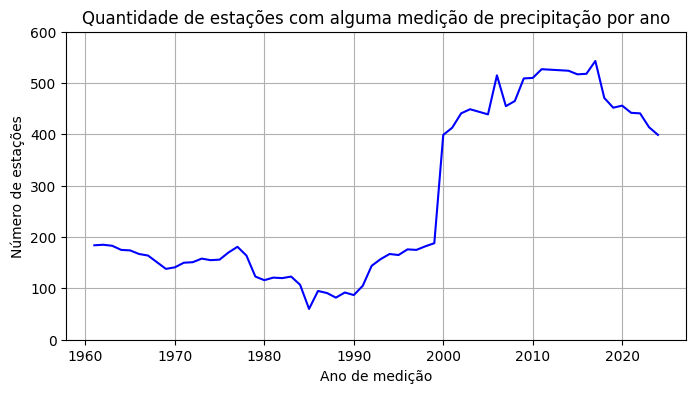

In [4]:
plt.figure(figsize=(8,4))
plt.title('Quantidade de estações com alguma medição de precipitação por ano')
plt.grid()
plt.ylabel('Número de estações')
plt.xlabel('Ano de medição')
plt.ylim((0,600))
g = sns.lineplot(data=fato_estacoes_precipitacao.groupby('year')['id_estacao'].nunique(),color='b')
g.set_axisbelow(True)

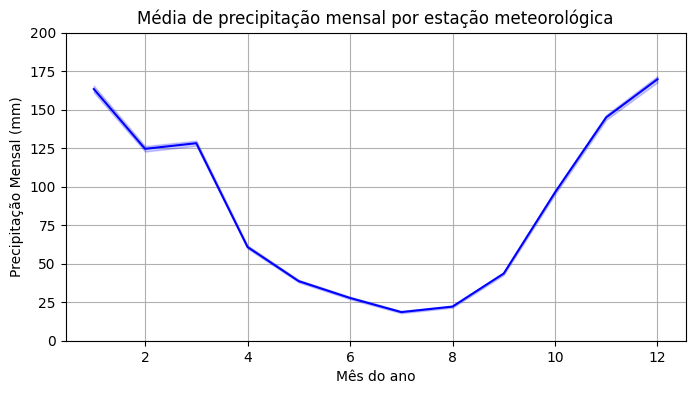

In [6]:
plt.figure(figsize=(8,4))
plt.title('Média de precipitação mensal por estação meteorológica')
plt.grid()
plt.xlabel('Mês do ano')
plt.ylabel('Precipitação Mensal (mm)')
plt.ylim((0,200))
g = sns.lineplot(data=fato_estacoes_precipitacao.loc[fato_estacoes_precipitacao['dt_medicao'].dt.year>=2010].groupby(['id_estacao','year','month'],as_index=False)['vl_precipitacao'].sum(),
    x='month',y='vl_precipitacao',color='b')

g.set_axisbelow(True)

In [45]:
fato_estacoes_precipitacao['vl_precipitacao'].quantile(0.66)

0.04

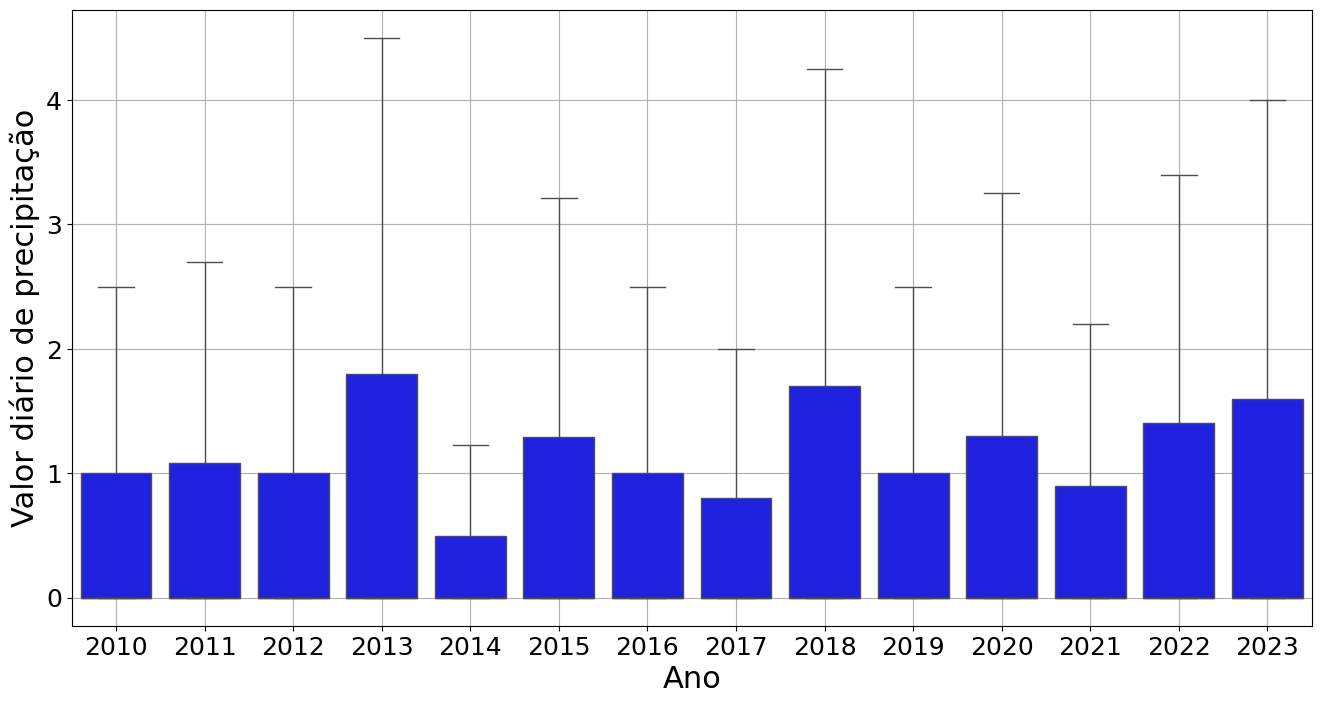

In [17]:
plt.figure(figsize=(16,8))
g = sns.boxplot(data=fato_estacoes_precipitacao.loc[fato_estacoes_precipitacao['year'].isin(range(2010,2024))],y='vl_precipitacao',x='year',showfliers=False,color='b')
plt.grid()
plt.xlabel('Ano',fontsize=22)
plt.ylabel('Valor diário de precipitação',fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
g.set_axisbelow(True)

In [55]:
abt = sql("SELECT * FROM r2_ouro.ABT_satelite_all WHERE vl_precipitacao>0 AND vl_precipitacao<=51 AND YEAR(CAST(dt_medicao AS DATE))>=2010")

<Axes: xlabel='vl_temperatura_maxima', ylabel='vl_precipitacao'>

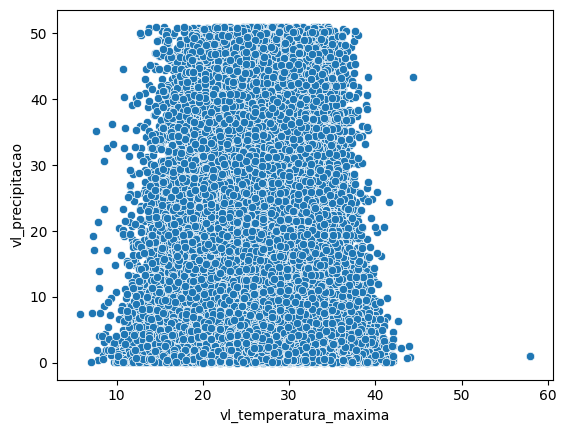

In [64]:
sns.scatterplot(data=abt,y='vl_precipitacao',x='vl_temperatura_maxima')

## Análise: Estações Vizinhas

In [2]:
sql(show_tables_ouro_query)

,table_name
0,abt_bruto
1,ABT_satelite_AgCFSR
2,ABT_satelite_AgMERRA
3,ABT_satelite_GL
4,ABT_satelite_PERSIANN_CDR
5,fato_estacoes_temperatura_minima
6,fato_estacoes_umidade_relativa_minima
7,ABT_satelite_all
8,ABT_satelite_GPM_Late_Run
9,ABT_satelite_POWER


In [3]:
sql(
"""
SELECT 
    dim.id_estacao_base
    ,base.vl_precipitacao AS vl_precipitacao_base
    ,dim.id_estacao_vizinha
FROM r2_ouro.dim_estacoes_escolha_vizinha AS dim
JOIN r2_ouro.fato_estacoes_precipitacao AS base
    ON dim.id_estacao_base = base.id_estacao
JOIN r2_ouro.fato_estacoes_precipitacao AS vizinha
    ON dim.id_estacao_vizinha

""")

,id_estacao_base,id_estacao_vizinha,pct_dados_faltantes_intersecao,distancia_km
0,32816,1307,0.140468,391.715175
1,32817,1244,0.000795,545.205167
2,32817,1311,0.000000,1035.338445
3,32818,1228,0.000000,578.887202
4,32818,1305,0.000000,228.409822
...,...,...,...,...
288840,17,436,0.000000,514.861670
288841,1203,37235,0.125000,446.891219
288842,1272,37241,0.000000,208.489758
288843,30824,183612,0.000000,189.866058


Text(0, 0.5, 'Correlação de Pearson')

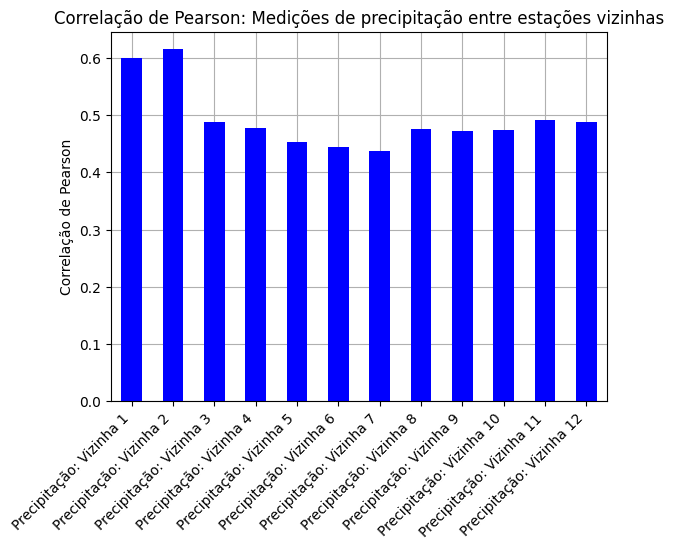

In [40]:
abt_bruto = sql(
"""
SELECT 
    * 
FROM r2_ouro.abt_bruto 
WHERE 1=1
    AND vl_precipitacao >=0 AND vl_precipitacao <= 51
    AND vl_precipitacao_vizinha_1 >= 0 AND vl_precipitacao_vizinha_1 <= 51
    AND vl_precipitacao_vizinha_2 >= 0 AND vl_precipitacao_vizinha_2 <= 51
    AND vl_precipitacao_vizinha_3 >= 0 AND vl_precipitacao_vizinha_3 <= 51
    AND vl_precipitacao_vizinha_4 >= 0 AND vl_precipitacao_vizinha_4 <= 51
    AND vl_precipitacao_vizinha_5 >= 0 AND vl_precipitacao_vizinha_5 <= 51
    AND vl_precipitacao_vizinha_6 >= 0 AND vl_precipitacao_vizinha_6 <= 51
    AND vl_precipitacao_vizinha_7 >= 0 AND vl_precipitacao_vizinha_7 <= 51
    AND vl_precipitacao_vizinha_8 >= 0 AND vl_precipitacao_vizinha_8 <= 51
    AND vl_precipitacao_vizinha_9 >= 0 AND vl_precipitacao_vizinha_9 <= 51
    AND vl_precipitacao_vizinha_10 >= 0 AND vl_precipitacao_vizinha_10 <= 51
    AND vl_precipitacao_vizinha_11 >= 0 AND vl_precipitacao_vizinha_11 <= 51
    AND vl_precipitacao_vizinha_12 >= 0 AND vl_precipitacao_vizinha_12 <= 51
    """)

g = abt_bruto[[c for c in abt_bruto.columns if 'precipitacao' in c]].corr()['vl_precipitacao'].drop('vl_precipitacao').plot.bar(color='b')
plt.grid()
plt.title("Correlação de Pearson: Medições de precipitação entre estações vizinhas")
g.set_axisbelow(True)
g.set_xticklabels([f'Precipitação: Vizinha {i}' for i in range(1,13)])
plt.xticks(rotation=45,ha='right')
g.set_ylabel('Correlação de Pearson')

Text(0, 0.5, 'Correlação de Pearson')

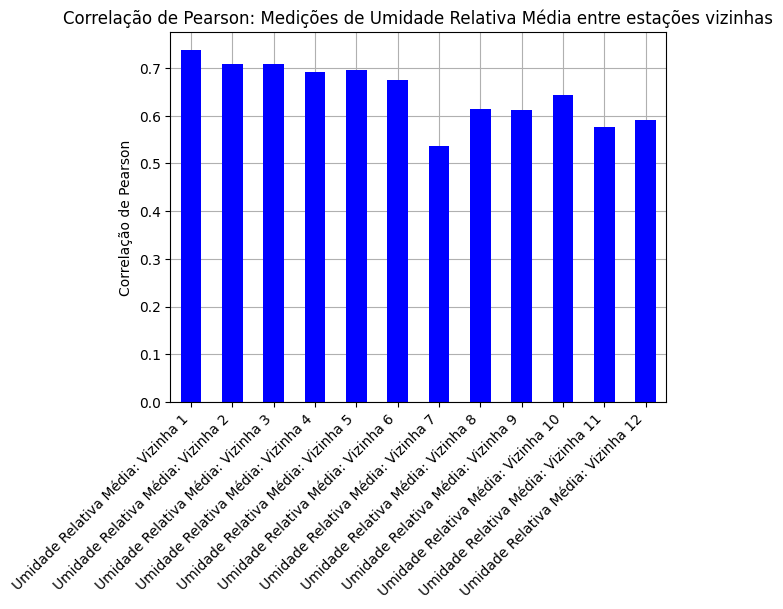

In [56]:
medicao = 'Umidade Relativa Média'
medicao_column = medicao.lower().replace(' ','_').replace('é','e').replace('í','i').replace('á','a')
# abt_bruto = sql(
# """
# SELECT 
#     * 
# FROM r2_ouro.abt_bruto 
# WHERE 1=1
#     """)

g = abt_bruto[[c for c in abt_bruto.columns if medicao_column in c]].corr()[f'vl_{medicao_column}'].drop(f'vl_{medicao_column}').plot.bar(color='b')
plt.grid()
plt.title(f"Correlação de Pearson: Medições de {medicao} entre estações vizinhas")
g.set_axisbelow(True)
g.set_xticklabels([f'{medicao}: Vizinha {i}' for i in range(1,13)])
plt.xticks(rotation=45,ha='right')
g.set_ylabel('Correlação de Pearson')

## Previsão só com satélites

In [2]:
from metrics import MAE,RMSE,R2_DET,PSC,PSC_A,PCC_A,PMC_A

In [3]:
satelites = ['AgCFSR','CHIRPS','CPC','GL','GPM_Final_Run','GPM_Late_Run','PERSIANN_CDR','POWER','TRMM']
max_prec = 51
abt_satelites = {}
abt_satelites['CHIRPS'] = sql(f"SELECT vl_precipitacao,vl_precipitacao_CHIRPS FROM r2_ouro.ABT_satelite_CHIRPS WHERE vl_precipitacao IS NOT NULL AND vl_precipitacao_CHIRPS IS NOT NULL AND YEAR(CAST(dt_medicao AS DATE))>=2016 AND vl_precipitacao>=0 AND vl_precipitacao<={max_prec}")
abt_satelites['CPC'] = sql(f"SELECT vl_precipitacao,vl_precipitacao_CPC FROM r2_ouro.ABT_satelite_CPC WHERE vl_precipitacao IS NOT NULL AND vl_precipitacao_CPC IS NOT NULL AND YEAR(CAST(dt_medicao AS DATE))>=2016 AND vl_precipitacao>=0 AND vl_precipitacao<={max_prec}")
abt_satelites['GPM_Final_Run'] = sql(f"SELECT vl_precipitacao,vl_precipitacao_GPM_Final_Run FROM r2_ouro.ABT_satelite_GPM_Final_Run WHERE vl_precipitacao IS NOT NULL AND vl_precipitacao_GPM_Final_Run IS NOT NULL AND YEAR(CAST(dt_medicao AS DATE))>=2016 AND vl_precipitacao>=0 AND vl_precipitacao<={max_prec}")
abt_satelites['GPM_Late_Run'] = sql(f"SELECT vl_precipitacao,vl_precipitacao_GPM_Late_Run FROM r2_ouro.ABT_satelite_GPM_Late_Run WHERE vl_precipitacao IS NOT NULL AND vl_precipitacao_GPM_Late_Run IS NOT NULL AND YEAR(CAST(dt_medicao AS DATE))>=2016 AND vl_precipitacao>=0 AND vl_precipitacao<={max_prec}")
abt_satelites['PERSIANN_CDR'] = sql(f"SELECT vl_precipitacao,vl_precipitacao_PERSIANN_CDR FROM r2_ouro.ABT_satelite_PERSIANN_CDR WHERE vl_precipitacao IS NOT NULL AND vl_precipitacao_PERSIANN_CDR IS NOT NULL AND YEAR(CAST(dt_medicao AS DATE))>=2016 AND vl_precipitacao>=0 AND vl_precipitacao<={max_prec}")
abt_satelites['POWER'] = sql(f"SELECT vl_precipitacao,vl_precipitacao_total_corrigido_POWER FROM r2_ouro.ABT_satelite_POWER WHERE vl_precipitacao IS NOT NULL AND vl_precipitacao_total_corrigido_POWER IS NOT NULL AND YEAR(CAST(dt_medicao AS DATE))>=2016 AND vl_precipitacao>=0 AND vl_precipitacao<={max_prec}")
abt_satelites['TRMM'] = sql(f"SELECT vl_precipitacao,vl_precipitacao_TRMM FROM r2_ouro.ABT_satelite_TRMM WHERE vl_precipitacao IS NOT NULL AND vl_precipitacao_TRMM IS NOT NULL AND YEAR(CAST(dt_medicao AS DATE))>=2016 AND vl_precipitacao>=0 AND vl_precipitacao<={max_prec}")

In [4]:
for satelite,df in abt_satelites.items():
    print(satelite)
    y_pred = df.iloc[:,1]
    y_true = df.iloc[:,0]
    print(f'MAE: {MAE(y_pred,y_true):.3f}')
    print(f'RMSE: {RMSE(y_pred,y_true):.3f}')
    print(f'R2_DET: {R2_DET(y_pred,y_true):.3f}')
    print(f'PSC: {PSC(y_pred,y_true):.2f}%')
    print(f'PSC_A(0.5): {PSC_A(y_pred,y_true,0.5):.2f}%')
    print(f'PCC_A(0.5): {PCC_A(y_pred,y_true,0.5):.2f}%')
    print(f'PMC_A(5,20): {PMC_A(y_pred,y_true,5,20):.2f}%')
    print()

CHIRPS
MAE: 41.042
RMSE: 610.902
R2_DET: -0.003
PSC: 71.76%
PSC_A(0.5): 80.79%
PCC_A(0.5): 4.06%
PMC_A(5,20): 10.45%

CPC
MAE: 2.726
RMSE: 6.678
R2_DET: 0.009
PSC: 89.96%
PSC_A(0.5): 94.09%
PCC_A(0.5): 34.99%
PMC_A(5,20): 18.97%

GPM_Final_Run
MAE: 2.969
RMSE: 7.077
R2_DET: 0.209
PSC: 81.96%
PSC_A(0.5): 90.51%
PCC_A(0.5): 20.91%
PMC_A(5,20): 14.71%

GPM_Late_Run
MAE: 3.502
RMSE: 8.810
R2_DET: 0.056
PSC: 79.93%
PSC_A(0.5): 88.62%
PCC_A(0.5): 23.34%
PMC_A(5,20): 10.94%

PERSIANN_CDR
MAE: 3.576
RMSE: 7.594
R2_DET: -0.112
PSC: 79.34%
PSC_A(0.5): 87.83%
PCC_A(0.5): 6.51%
PMC_A(5,20): 11.71%

POWER
MAE: 3.399
RMSE: 7.974
R2_DET: -0.096
PSC: 95.74%
PSC_A(0.5): 99.01%
PCC_A(0.5): 40.98%
PMC_A(5,20): 11.78%

TRMM
MAE: 3.477
RMSE: 8.615
R2_DET: 0.036
PSC: 76.09%
PSC_A(0.5): 84.54%
PCC_A(0.5): 8.30%
PMC_A(5,20): 10.18%



In [5]:
conn.close()

In [58]:
for c in (sql("SELECT * FROM r2_ouro.abt_bruto LIMIT 100").columns):
    print(c)

id_estacao
dt_medicao
vl_temperatura_minima
nm_grupo_estacao
id_estacao_vizinha_1
vl_temperatura_minima_vizinha_1
id_estacao_vizinha_2
vl_temperatura_minima_vizinha_2
id_estacao_vizinha_3
vl_temperatura_minima_vizinha_3
id_estacao_vizinha_4
vl_temperatura_minima_vizinha_4
id_estacao_vizinha_5
vl_temperatura_minima_vizinha_5
id_estacao_vizinha_6
vl_temperatura_minima_vizinha_6
id_estacao_vizinha_7
vl_temperatura_minima_vizinha_7
id_estacao_vizinha_8
vl_temperatura_minima_vizinha_8
id_estacao_vizinha_9
vl_temperatura_minima_vizinha_9
id_estacao_vizinha_10
vl_temperatura_minima_vizinha_10
id_estacao_vizinha_11
vl_temperatura_minima_vizinha_11
id_estacao_vizinha_12
vl_temperatura_minima_vizinha_12
vl_temperatura_media
vl_temperatura_media_vizinha_1
vl_temperatura_media_vizinha_2
vl_temperatura_media_vizinha_3
vl_temperatura_media_vizinha_4
vl_temperatura_media_vizinha_5
vl_temperatura_media_vizinha_6
vl_temperatura_media_vizinha_7
vl_temperatura_media_vizinha_8
vl_temperatura_media_vizinha

In [48]:
grupo_estacao = 'UNESP'
print(grupo_estacao)
sql(
f"""
SELECT 
    STRFTIME('%d/%m/%Y', MIN(dt_medicao)::DATE) AS min
    ,STRFTIME('%d/%m/%Y', MAX(dt_medicao)::DATE) AS max 
FROM r2_prata.fato_estacao_{grupo_estacao}""")

UNESP


,min,max
0,01/01/1961,21/03/2018


In [45]:
with pd.option_context('display.max_rows',None):    
    print(sql(f"SELECT COUNT(*),YEAR(CAST(dt_medicao AS DATE)) FROM r2_prata.fato_estacao_{grupo_estacao} GROUP BY YEAR(CAST(dt_medicao AS DATE)) ORDER BY YEAR(CAST(dt_medicao AS DATE))"))

     count_star()  "year"(CAST(dt_medicao AS DATE))
0             365                              1890
1             365                              1891
2             366                              1892
3             365                              1893
4             365                              1894
5             365                              1895
6             366                              1896
7             365                              1897
8             365                              1898
9             365                              1899
10            365                              1900
11            365                              1901
12            365                              1902
13            365                              1903
14            366                              1904
15            365                              1905
16            365                              1906
17            365                              1907
18          

In [2]:
sql(show_tables_prata_query)

,table_name
0,fato_satelite_AgMERRA
1,fato_satelite_CPC
2,fato_estacao_CEMADEN
3,fato_estacao_UNESP
4,fato_estacao_ANA
5,fato_satelite_GPM_Late_Run
6,fato_satelite_POWER
7,fato_estacao_CEMIG
8,fato_estacao_IAC
9,fato_estacao_INMET_AGRI
